# We will try to create a simple Machine Learning model that will try to distinguish facial expression

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [32]:
image_folder="E:\Facial_Expression_Dataset"
os.listdir(image_folder)

['Happy', 'Sad']

In [33]:
angry_image=os.listdir(image_folder)[0]
angry_image

'Happy'

In [34]:
demo_image_path = os.path.join(image_folder, angry_image, os.listdir(os.path.join(image_folder, angry_image))[0])
demo_image_path

'E:\\Facial_Expression_Dataset\\Happy\\happy (1).bmp'

In [35]:
angry_image_files=os.listdir(os.path.join(image_folder,angry_image))
angry_image_files[:10]

['happy (1).bmp',
 'happy (1).jpeg',
 'happy (1).JPG',
 'happy (1).png',
 'happy (10).jpeg',
 'happy (10).jpg',
 'happy (10).png',
 'happy (100).jpg',
 'happy (100).png',
 'happy (1000).jpg']

(240, 240, 3)
(180, 180)


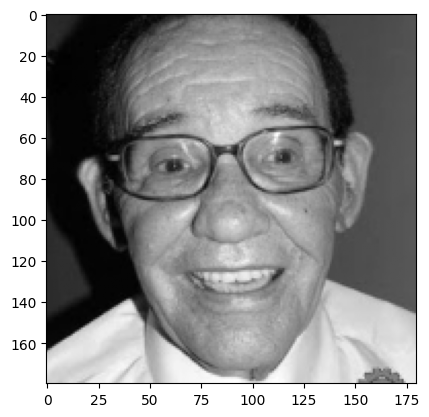

In [36]:
demo_image=cv2.imread(demo_image_path)
print(demo_image.shape)

def is_grayscale(image):
    if len(image.shape) == 3 and image.shape[2] == 3:
        b, g, r = cv2.split(image)
        return np.array_equal(b, g) and np.array_equal(b, r)
    return True

def preprocess_image(image_path):
    # print(f"Processing image : {image_path} ")
    demo_image=cv2.imread(demo_image_path)
    if not is_grayscale(demo_image):
        demo_image = cv2.cvtColor(demo_image, cv2.COLOR_BGR2GRAY)
    demo_image=cv2.resize(demo_image,(180,180))
    demo_image=demo_image / 255.0
    return demo_image
demo_image=preprocess_image(demo_image_path)
print(demo_image.shape)
plt.imshow(demo_image,cmap='gray')

# A look at Hog feature extraction

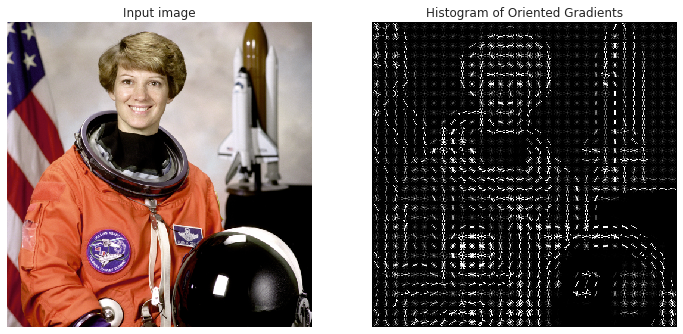

In [37]:
from skimage.feature import hog
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

def extract_hog_features(image): 
    # Convert to grayscale only if it has 3 channels
    if len(image.shape) == 3 and image.shape[2] == 3:
        image = rgb2gray(image) 

    features = hog(image, pixels_per_cell=(2, 2), 
                   cells_per_block=(2, 2), orientations=8)
    return features


In [38]:
catagories=os.listdir(image_folder)
catagories

['Happy', 'Sad']

# Use Python arrays to store the X and Y values

In [39]:
M=[]
Y=[]

In [40]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

# Initialize incremental learning classifier

In [41]:
batch_size = 100
clf = SGDClassifier()
label_encoder = LabelEncoder()

In [42]:
demo=os.path.join(os.path.join(image_folder,catagories[0]),angry_image_files[0])
demo

'E:\\Facial_Expression_Dataset\\Happy\\happy (1).bmp'

In [43]:
for catagory in catagories:
    folder_path=os.path.join(image_folder,catagory)
    image_files=os.listdir(folder_path)
    print(f"Listing images of {catagory} Folder")
    print(f"Total files found: {len(image_files)}")    
    print(f"Current Y value: {catagory}")    

    for file in image_files:
        file_path=os.path.join(os.path.join(image_folder,catagory),file)
        M.append(file_path)
        Y.append(catagory)

Listing images of Happy Folder
Total files found: 3740
Current Y value: Happy
Listing images of Sad Folder
Total files found: 3934
Current Y value: Sad


# Check if the image paths are stored correctly

In [44]:
print(M[:5])

['E:\\Facial_Expression_Dataset\\Happy\\happy (1).bmp', 'E:\\Facial_Expression_Dataset\\Happy\\happy (1).jpeg', 'E:\\Facial_Expression_Dataset\\Happy\\happy (1).JPG', 'E:\\Facial_Expression_Dataset\\Happy\\happy (1).png', 'E:\\Facial_Expression_Dataset\\Happy\\happy (10).jpeg']


In [45]:
print(len(M))

7674


In [46]:
print(Y[:5])

['Happy', 'Happy', 'Happy', 'Happy', 'Happy']


In [47]:
labels = label_encoder.fit_transform(Y)

In [48]:
print(labels[:5])

[0 0 0 0 0]


In [49]:
label_encoder.inverse_transform([0])

array(['Happy'], dtype='<U5')

In [50]:
M, labels = shuffle(M, labels, random_state=42)

In [51]:
labels[:5]

array([1, 0, 1, 1, 0], dtype=int64)

In [52]:
cnt=0
for i in range(0, len(M), batch_size):
    batch_paths = M[i:i+batch_size]
    batch_labels = labels[i:i+batch_size]
    
    features = []
    for path in batch_paths:

        image = preprocess_image(path)
        if image is None:
            print(f"Warning: Couldn't read image {path}")
            cnt+=1
            continue 
        
        hog_feature =extract_hog_features(image)
        features.append(hog_feature)
    
    features = np.array(features)
    batch_labels = np.array(batch_labels)
    
# On the first batch, it passes classes=np.unique(labels) so the model knows all possible classes.
    if i == 0:
        clf.partial_fit(features, batch_labels, classes=np.unique(labels))
    else:
        clf.partial_fit(features, batch_labels)

print(f"Training finished successfully with missing image = {cnt}! ")

Training finished successfully with missing image = 0! 


# Save the model

In [53]:
import joblib

joblib.dump(clf, "hog_model.pkl")
print("Model saved as hog_model.pkl")


Model saved as hog_model.pkl


In [56]:
import numpy as np


def predict_image(image_path, clf):
    """Preprocess the image, extract features, and make a prediction."""
    image = preprocess_image(image_path)
    features = extract_hog_features(image)
    features = np.array(features).reshape(1, -1)  # Ensure correct shape
    print("Feature shape:", features.shape)  # Debugging output
    prediction = clf.predict(features)
    return prediction[0]  # Return the predicted clas



# Test model for a demo image

In [57]:

# Example image path
image_path = r"E:\Machine Learning\Image Classification\image.png"

# Predict the image
clf = joblib.load("hog_model.pkl")
print("Model loaded successfully!")

predicted_label = predict_image(image_path, clf)

# Display the result
print(f"Predicted Class: {label_encoder.inverse_transform([predicted_label])}")

Model loaded successfully!
Feature shape: (1, 253472)
Predicted Class: ['Sad']
